# K-Means Clustering

Deskripsi     : Script berikut ini adalah script yang digunakan untuk melakukan K-Means Clustering

Dataset       : Dataset Dummy yang terdiri dari dua variabel, yaitu variabel gaji dan pengeluaran

## Latar Belakang

Sebuah perusahaan melakukan penelitian terhadap data-data konsumen yang dimilikinya. Perusahaan tersebut akan melakukan pengelompokan data ke dalam beberapa cluster berdasarkan kriteria besaran gaji yang diterima dan pengeluaran per bulannya. 


## Bagaimana cara melakukan clustering?

Langkah pertama yang mesti kita lakukan adalah dengan memanggil library atau pustaka yang dibutuhkan, yaitu matplotlib, numpy, pandas, dan sklearn. 

In [21]:
# Step 1. Memanggil Library yang dibutuhkan 

%matplotlib inline 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from sklearn.cluster import KMeans

Langkah kedua adalah memanggil Dataset 

In [22]:
# Step 2. Memanggil dataset 
dataset = pd.read_csv('gaji_pengeluaran.csv')
dataset.keys()

Index(['gaji', 'pengeluaran'], dtype='object')

In [40]:
# Menampilkan 5 baris data pertama 
dataset.head() #untuk menampilkan 5 baris data pertama 
dataset.shape

(30, 2)

Langkah ketiga adalah dengan melakukan konversi dataset ke data array 

In [41]:
dataset

,gaji,pengeluaran
0,2500,1750
1,3800,4200
2,3900,3800
3,4350,5500
4,4400,3200
5,5500,5450
6,5600,5950
7,5750,4100
8,6850,6050
9,6900,8500


In [42]:
# Step 3. Konversi Dataset ke Data Array 
X = np.asarray(dataset)

Langkah keempat adalah menampilkan Data Array ke dalam Scatter plot 

Text(0.5, 1.0, 'Grafik Konsumen')

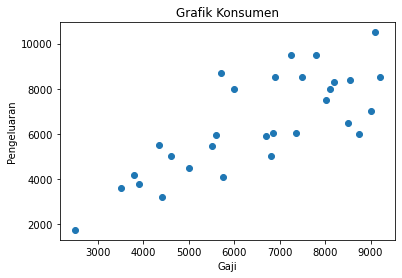

In [43]:
## Step 4. Menampilkan data ke dalam grafik scatterplot 
plt.scatter(X[:,0],X[:,1], label = 'True Position')
plt.xlabel("Gaji")
plt.ylabel("Pengeluaran")
plt.title("Grafik Konsumen")

Langkah kelima adalah melakukan algoritma K-Means dengan jumlah K yang ditentukan dengan scree plot

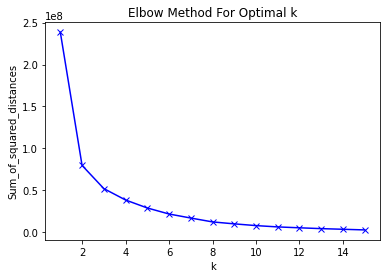

In [44]:
Sum_of_squared_distances = []
K = range(1,16)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [45]:
# Step 5. Melakukan aktivasi algoritma K-Means 
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

Langkah keenam adalah menampilkan nilai centroid dan label data point 

In [46]:
# Step 6. Menampilkan nilai centroid yang dibangkitkan oleh algoritma kmeans 
print(kmeans.cluster_centers_)

[[7006.25       5862.5       ]
 [7793.84615385 8530.76923077]
 [4200.         3961.11111111]]


In [47]:
print(kmeans.labels_)

[2 2 2 2 2 0 0 2 0 1 1 0 1 1 1 0 1 0 1 1 1 2 0 2 1 0 1 1 1 2]


In [48]:
a = kmeans.labels_
X

array([[ 2500,  1750],
       [ 3800,  4200],
       [ 3900,  3800],
       [ 4350,  5500],
       [ 4400,  3200],
       [ 5500,  5450],
       [ 5600,  5950],
       [ 5750,  4100],
       [ 6850,  6050],
       [ 6900,  8500],
       [ 7250,  9500],
       [ 7350,  6050],
       [ 7500,  8500],
       [ 7800,  9500],
       [ 8200,  8300],
       [ 8500,  6500],
       [ 8550,  8400],
       [ 8750,  6000],
       [ 9100, 10500],
       [ 9200,  8500],
       [ 6000,  8000],
       [ 5000,  4500],
       [ 6700,  5900],
       [ 4600,  5000],
       [ 5700,  8700],
       [ 6800,  5000],
       [ 9010,  7000],
       [ 8010,  7500],
       [ 8100,  8000],
       [ 3500,  3600]], dtype=int64)

Langkah ketujuh adalah visualisasi hasil clustering

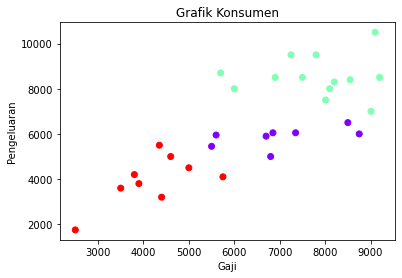

In [49]:
# Step 7 Visualisasi Hasil 
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.xlabel("Gaji")
plt.ylabel("Pengeluaran")
plt.title("Grafik Konsumen")
plt.show()

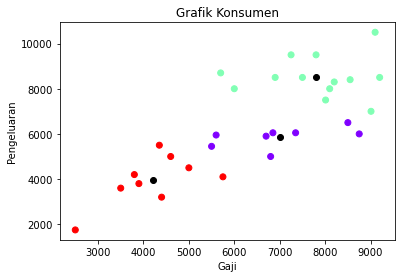

In [50]:
# Step 8 Menampilkan hasil centroid 
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color='black')
plt.xlabel("Gaji")
plt.ylabel("Pengeluaran")
plt.title("Grafik Konsumen")
plt.show()

In [51]:
# Memasukkan hasil label ke dalam suatu data frame 
data_clustered = pd.DataFrame(X)
data_clustered['cluster'] = pd.DataFrame(kmeans.labels_)
data_clustered = data_clustered.sort_values('cluster')
data_clustered = np.asarray(data_clustered)

In [52]:
data_clustered

array([[ 6700,  5900,     0],
       [ 6800,  5000,     0],
       [ 8750,  6000,     0],
       [ 5500,  5450,     0],
       [ 5600,  5950,     0],
       [ 6850,  6050,     0],
       [ 8500,  6500,     0],
       [ 7350,  6050,     0],
       [ 9200,  8500,     1],
       [ 9100, 10500,     1],
       [ 8550,  8400,     1],
       [ 8100,  8000,     1],
       [ 7800,  9500,     1],
       [ 8200,  8300,     1],
       [ 6000,  8000,     1],
       [ 6900,  8500,     1],
       [ 5700,  8700,     1],
       [ 9010,  7000,     1],
       [ 8010,  7500,     1],
       [ 7500,  8500,     1],
       [ 7250,  9500,     1],
       [ 4600,  5000,     2],
       [ 2500,  1750,     2],
       [ 5750,  4100,     2],
       [ 4400,  3200,     2],
       [ 4350,  5500,     2],
       [ 3900,  3800,     2],
       [ 3800,  4200,     2],
       [ 5000,  4500,     2],
       [ 3500,  3600,     2]], dtype=int64)

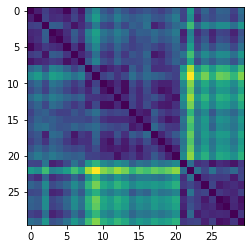

In [53]:
# Membuat similarity Matrix 
from scipy.spatial.distance import cdist
dist = cdist(data_clustered[:,0:2],data_clustered[:,0:2], metric='euclidean')
plt.imshow(dist)
plt.show()

In [54]:
# Menghitung Dunn's index 
# Mengingat tidak ada function Dunn's Index dalam sklearn, kita gunakan alternatif lain yaitu DB Index. 
# Silakan baca referensi berikut dan bisa dilakukan menginstall di laptop

Referensi: https://www.geeksforgeeks.org/dunn-index-and-db-index-cluster-validity-indices-set-1/ 

https://github.com/jqmviegas/jqm_cvi



In [55]:
# Namun ketika dicoba, package sklearn mesti dinaikkan versinya menjadi versi 0.21.2
# Alternatif lain, kita bisa melakukan pembuatan function seperti pada referensi berikut ini: 

Referensi: https://gist.github.com/douglasrizzo/cd7e792ff3a2dcaf27f6